**IMPORT CSV**

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
# importing pandas package
import pandas as pd
 
# making data frame from csv file
df_csv = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/kualitas_udara/pm25/pm25_satuan.csv')

**SET THE TIME TO .DATETIME FORMAT**

In [3]:
# overwriting data after changing format
df_csv['time']= pd.to_datetime(df_csv['time'])
 
# info of data
df_csv.info()
 
# display
print(df_csv.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       54000 non-null  datetime64[ns]
 1   latitude   54000 non-null  float64       
 2   longitude  54000 non-null  float64       
 3   pm2p5      54000 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.6 MB
        time  latitude  longitude      pm2p5
0 2018-01-01      -7.0     106.00  20.693172
1 2018-01-01      -7.0     106.05  21.581336
2 2018-01-01      -7.0     106.10  22.469501
3 2018-01-01      -7.0     106.15  23.357665
4 2018-01-01      -7.0     106.20  24.245829


In [4]:
df_csv['month'] = df_csv['time'].dt.month

In [5]:
df_csv['year'] = df_csv['time'].dt.year

**IMPORT SHP FILE**

In [6]:
# Load shapefile into a GeoDataFrame
gdf_shapefile = gpd.read_file(r"/Users/roniabuhanif/Downloads/BMKG/data_skripsi/petadki_kecamatan_2/kecamatan/Kecamatan-DKI-Jakarta-polygon.shp")

In [10]:
gdf_shapefile.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          44 non-null     object  
 1   @id         44 non-null     object  
 2   admin_leve  44 non-null     object  
 3   boundary    44 non-null     object  
 4   is_in_prov  44 non-null     object  
 5   is_in_town  44 non-null     object  
 6   name        44 non-null     object  
 7   type        44 non-null     object  
 8   geometry    44 non-null     geometry
dtypes: geometry(1), object(8)
memory usage: 3.2+ KB


**CREATE GEOMETRY FROM SHP AND CSV**

In [7]:
geometry = gpd.points_from_xy(df_csv['longitude'], df_csv['latitude'])
gdf_csv = gpd.GeoDataFrame(df_csv, geometry=geometry, crs='EPSG:4326')

<Axes: >

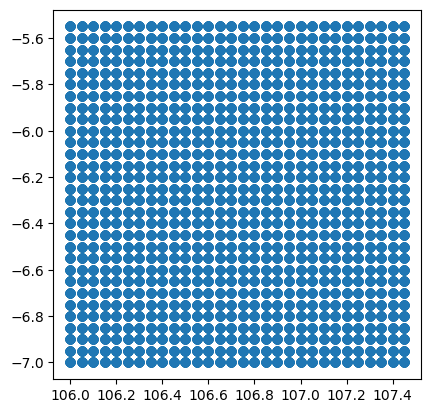

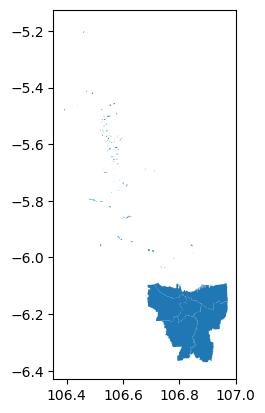

In [8]:
gdf_csv.plot()
gdf_shapefile.plot()

In [8]:
gdf_csv

,time,latitude,longitude,pm2p5,month,year,geometry
0,2018-01-01,-7.00,106.00,20.693172,1,2018,POINT (106.00000 -7.00000)
1,2018-01-01,-7.00,106.05,21.581336,1,2018,POINT (106.05000 -7.00000)
2,2018-01-01,-7.00,106.10,22.469501,1,2018,POINT (106.10000 -7.00000)
3,2018-01-01,-7.00,106.15,23.357665,1,2018,POINT (106.15000 -7.00000)
4,2018-01-01,-7.00,106.20,24.245829,1,2018,POINT (106.20000 -7.00000)
...,...,...,...,...,...,...,...
53995,2022-12-01,-5.55,107.25,26.086511,12,2022,POINT (107.25000 -5.55000)
53996,2022-12-01,-5.55,107.30,26.124793,12,2022,POINT (107.30000 -5.55000)
53997,2022-12-01,-5.55,107.35,26.163074,12,2022,POINT (107.35000 -5.55000)
53998,2022-12-01,-5.55,107.40,26.201355,12,2022,POINT (107.40000 -5.55000)


In [11]:
#join all the variables
result = gpd.sjoin(gdf_csv, gdf_shapefile, how='inner', predicate='intersects')

#add the columns
result_pop = result[['longitude', 'latitude', 'month', 'year', 'pm2p5', 'name', 'geometry', 'time']]

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1560 entries, 406 to 53830
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   longitude  1560 non-null   float64       
 1   latitude   1560 non-null   float64       
 2   month      1560 non-null   int32         
 3   year       1560 non-null   int32         
 4   pm2p5      1560 non-null   float64       
 5   name       1560 non-null   object        
 6   geometry   1560 non-null   geometry      
 7   time       1560 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), geometry(1), int32(2), object(1)
memory usage: 97.5+ KB


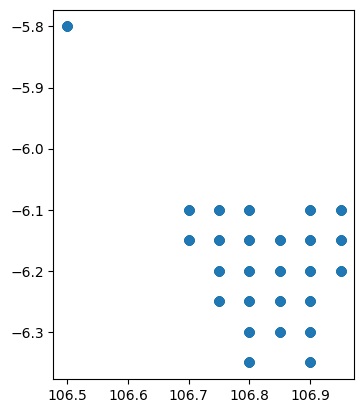

In [12]:
result_pop.plot()
result_pop.info()

**SHOW THE COLUMNS**

In [13]:
#input the columns to get the pm2.5 average/month
dissolved_result = result_pop.dissolve(by=['name','month'], aggfunc='mean')

dissolved_result.reset_index(inplace=True)
dissolved_result.head()

,name,month,geometry,longitude,latitude,year,pm2p5,time
0,Cakung,1,POINT (106.95000 -6.20000),106.95,-6.2,2020.0,40.181207,2020-01-01 09:36:00
1,Cakung,2,POINT (106.95000 -6.20000),106.95,-6.2,2020.0,41.984436,2020-02-01 09:36:00
2,Cakung,3,POINT (106.95000 -6.20000),106.95,-6.2,2020.0,48.424351,2020-02-29 14:24:00
3,Cakung,4,POINT (106.95000 -6.20000),106.95,-6.2,2020.0,56.785233,2020-03-31 14:24:00
4,Cakung,5,POINT (106.95000 -6.20000),106.95,-6.2,2020.0,61.247370,2020-04-30 14:24:00


In [14]:
#download data to .csv format
dissolved_result.to_csv('PM25_all_month_kec.csv')

**SET FOR MAPPING**

In [15]:
# ubah per month
import pandas as pd

In [16]:
#change into dataframe to drop the 'geometry' columns, etc
dissolved_result_df= pd.DataFrame(dissolved_result)
dissolved_result_df = dissolved_result_df.drop(['geometry'], axis = 1)

In [17]:
dissolved_result_df = dissolved_result_df.sort_values(by=['name', 'month'])

In [18]:
#download data to .csv format
dissolved_result_df.to_csv('pm25_kec_month.csv')

In [19]:
polygon_result = gpd.sjoin(gdf_shapefile, dissolved_result, how='inner', predicate='intersects')
print(polygon_result.columns)

Index(['id', '@id', 'admin_leve', 'boundary', 'is_in_prov', 'is_in_town',
       'name_left', 'type', 'geometry', 'index_right', 'name_right', 'month',
       'longitude', 'latitude', 'year', 'pm2p5', 'time'],
      dtype='object')


In [20]:
polygon_result

,id,@id,admin_leve,boundary,is_in_prov,is_in_town,name_left,type,geometry,index_right,name_right,month,longitude,latitude,year,pm2p5,time
0,relation/5802391,relation/5802391,6,administrative,DKI Jakarta,Jakarta Timur,Cipayung,boundary,"POLYGON ((106.91126 -6.29626, 106.91154 -6.296...",50,Cipayung,3,106.900,-6.325,2020.0,50.478024,2020-02-29 14:24:00
0,relation/5802391,relation/5802391,6,administrative,DKI Jakarta,Jakarta Timur,Cipayung,boundary,"POLYGON ((106.91126 -6.29626, 106.91154 -6.296...",49,Cipayung,2,106.900,-6.325,2020.0,44.212933,2020-02-01 09:36:00
0,relation/5802391,relation/5802391,6,administrative,DKI Jakarta,Jakarta Timur,Cipayung,boundary,"POLYGON ((106.91126 -6.29626, 106.91154 -6.296...",59,Cipayung,12,106.900,-6.325,2020.0,43.829400,2020-11-30 14:24:00
0,relation/5802391,relation/5802391,6,administrative,DKI Jakarta,Jakarta Timur,Cipayung,boundary,"POLYGON ((106.91126 -6.29626, 106.91154 -6.296...",58,Cipayung,11,106.900,-6.325,2020.0,52.362330,2020-10-31 14:24:00
0,relation/5802391,relation/5802391,6,administrative,DKI Jakarta,Jakarta Timur,Cipayung,boundary,"POLYGON ((106.91126 -6.29626, 106.91154 -6.296...",57,Cipayung,10,106.900,-6.325,2020.0,58.854699,2020-09-30 14:24:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,relation/7415048,relation/7415048,6,administrative,DKI Jakarta,Jakarta Selatan,Jagakarsa,boundary,"POLYGON ((106.84127 -6.32679, 106.84123 -6.326...",66,Jagakarsa,7,106.825,-6.325,2020.0,66.982207,2020-06-30 14:24:00
43,relation/7415048,relation/7415048,6,administrative,DKI Jakarta,Jakarta Selatan,Jagakarsa,boundary,"POLYGON ((106.84127 -6.32679, 106.84123 -6.326...",67,Jagakarsa,8,106.825,-6.325,2020.0,63.220575,2020-07-31 14:24:00
43,relation/7415048,relation/7415048,6,administrative,DKI Jakarta,Jakarta Selatan,Jagakarsa,boundary,"POLYGON ((106.84127 -6.32679, 106.84123 -6.326...",68,Jagakarsa,9,106.825,-6.325,2020.0,60.715924,2020-08-31 14:24:00
43,relation/7415048,relation/7415048,6,administrative,DKI Jakarta,Jakarta Selatan,Jagakarsa,boundary,"POLYGON ((106.84127 -6.32679, 106.84123 -6.326...",69,Jagakarsa,10,106.825,-6.325,2020.0,59.687016,2020-09-30 14:24:00


**MAPPING**

In [21]:
import calendar
import matplotlib.pyplot as plt

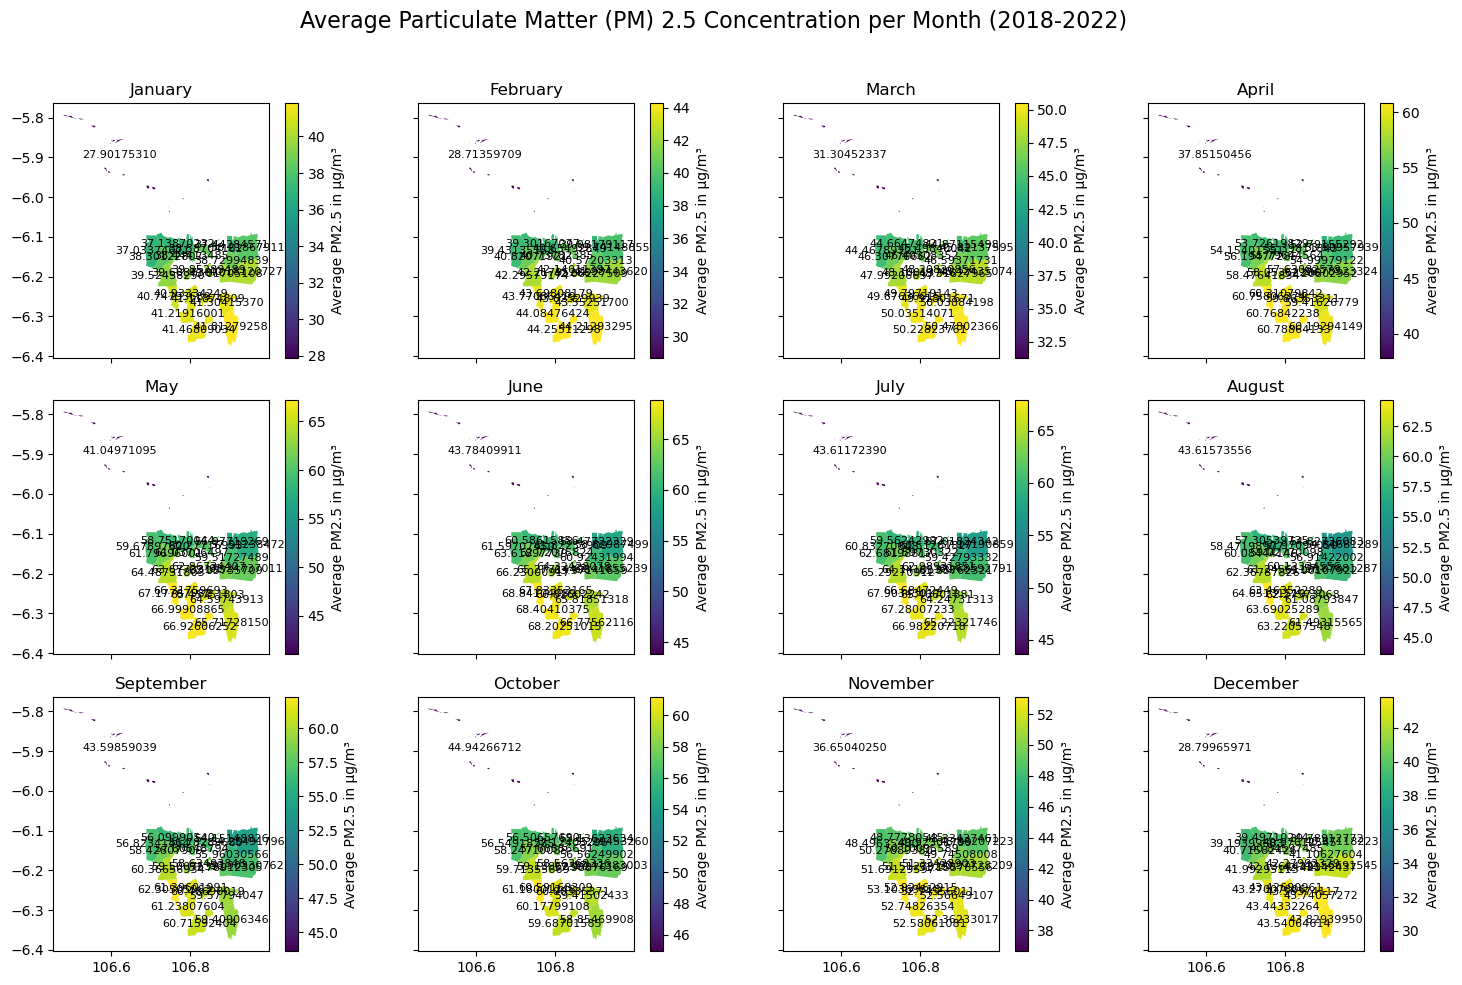

In [24]:
# Create a figure with subplots for each month
fig, axs = plt.subplots(3, 4, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Average Particulate Matter (PM) 2.5 Concentration per Month (2018-2022)', fontsize=16)

# Iterate through each month and plot the data
for month, ax in zip(range(1, 13), axs.flatten()):
    # Filter data for the current month
    data_monthly = polygon_result[polygon_result['month'] == month]

    # Plot the map for the current month
    data_monthly.plot(ax=ax, column="pm2p5", legend=True, legend_kwds={"label": "Average PM2.5 in µg/m³"})

    # Annotate each polygon with average PM2.5 value
    for idx, row in data_monthly.iterrows():
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y, f"{row['pm2p5']:.8f}", fontsize=8, ha='center', va='center')

    ax.set_title(calendar.month_name[month])  # Menggunakan modul calendar untuk mendapatkan nama bulan

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])


# If u want to change the color, use this script
# The colors are limited based on cmap
# Put these script before plt.show()
cmap = plt.get_cmap('plasma')
plt.set_cmap(cmap)
plt.show()

**GRAPHS**

In [22]:
import calendar

# Format for monthly graph
dissolved_result_df['month_name'] = pd.to_datetime(dissolved_result_df['month'], format='%m').dt.month_name()

# Set the ['month_name'] as an index
dissolved_result_df= dissolved_result_df.set_index('month_name')

Cakung
              name  month  longitude  latitude    year      pm2p5  \
month_name                                                          
January     Cakung      1     106.95      -6.2  2020.0  40.181207   
February    Cakung      2     106.95      -6.2  2020.0  41.984436   
March       Cakung      3     106.95      -6.2  2020.0  48.424351   
April       Cakung      4     106.95      -6.2  2020.0  56.785233   
May         Cakung      5     106.95      -6.2  2020.0  61.247370   
June        Cakung      6     106.95      -6.2  2020.0  62.418552   
July        Cakung      7     106.95      -6.2  2020.0  60.685928   
August      Cakung      8     106.95      -6.2  2020.0  57.878813   
September   Cakung      9     106.95      -6.2  2020.0  56.903308   
October     Cakung     10     106.95      -6.2  2020.0  57.413830   
November    Cakung     11     106.95      -6.2  2020.0  50.977282   
December    Cakung     12     106.95      -6.2  2020.0  42.566915   

                          

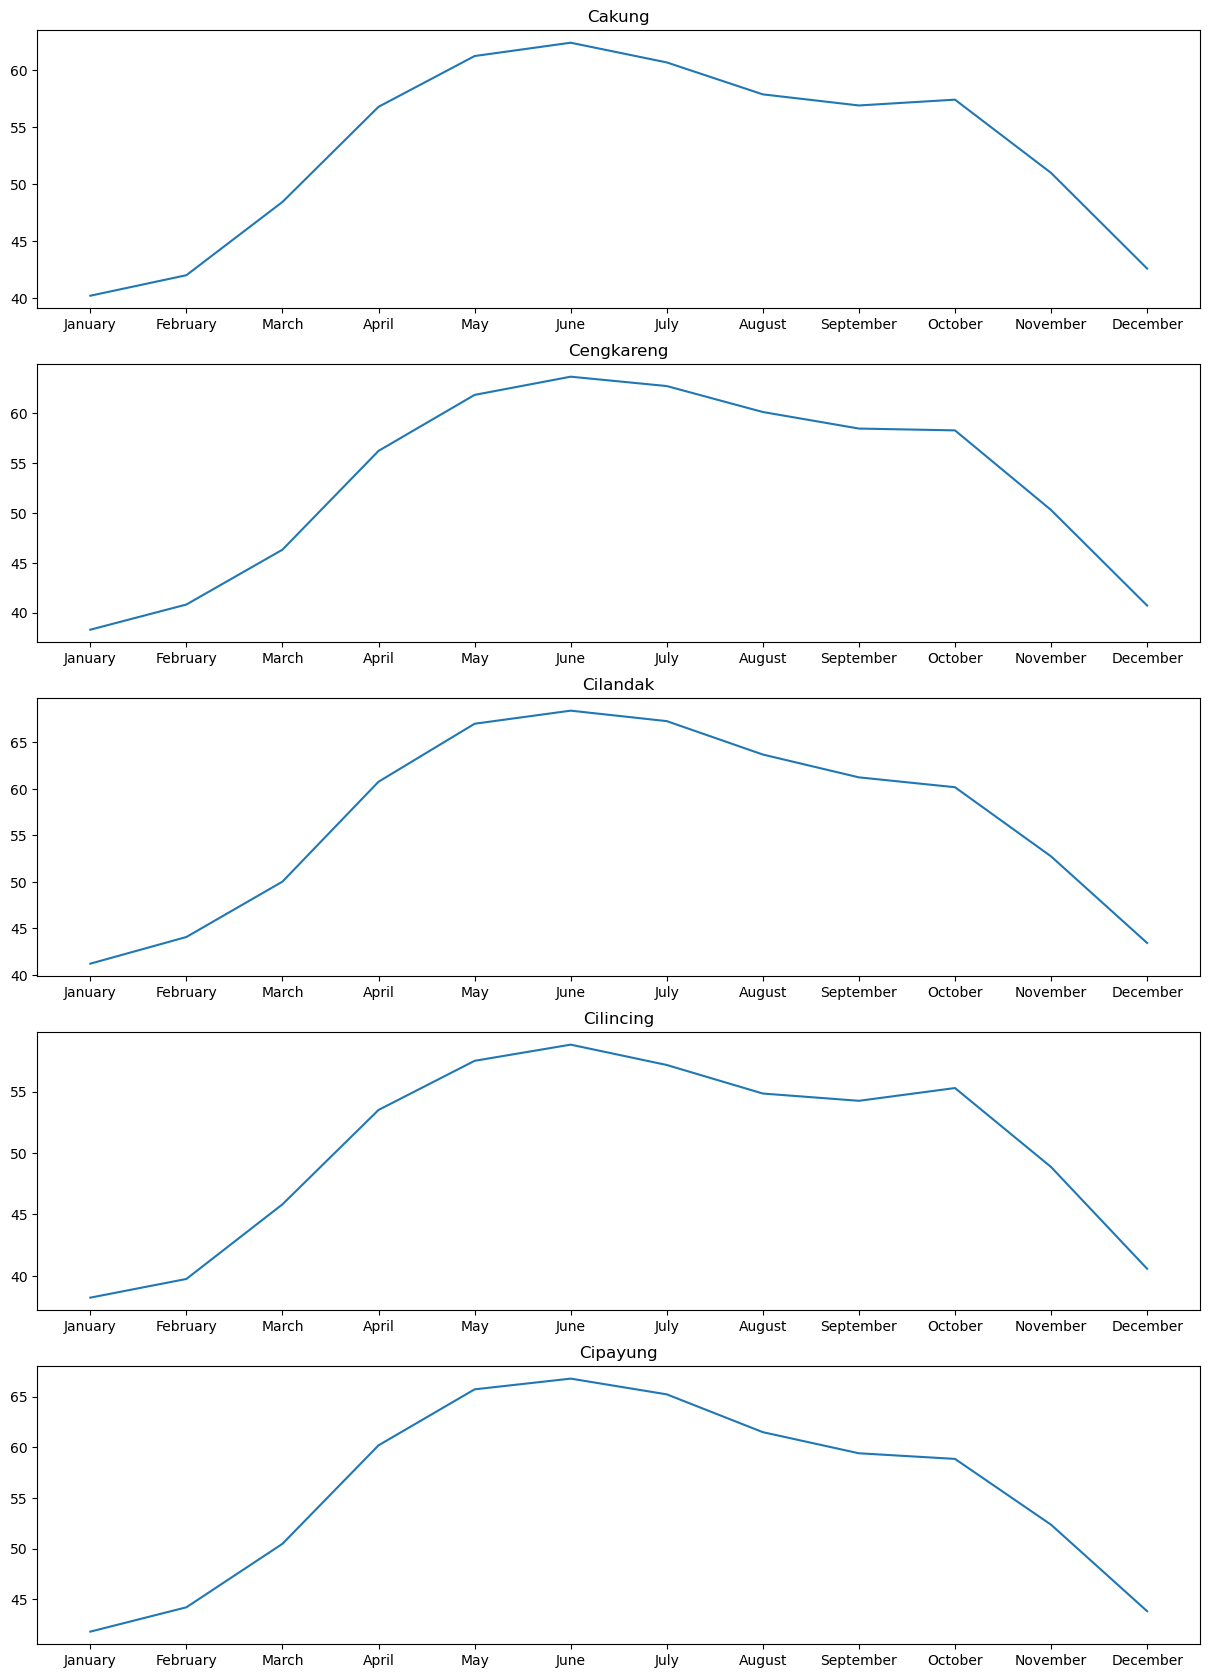

In [23]:
fig  = plt.figure(figsize=(15,60))
cities = list(dissolved_result_df['name'].unique())
# Iterate through each month and plot the data
for city, ax in zip(cities, range(1,6)):
    # Filter data for the current wilayah admin
    data_city = dissolved_result_df[dissolved_result_df['name'] == city]
    print(city)
    print(data_city)
    # Plot the map for the current kabkot
    fig.add_subplot(14, 1, ax)
    plt.plot(data_city['pm2p5'])
    plt.title(city)
    #ax.set_title(f'{city}')
